In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

%matplotlib inline

In c:\users\mattk\appdata\local\programs\python\python36\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In c:\users\mattk\appdata\local\programs\python\python36\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In c:\users\mattk\appdata\local\programs\python\python36\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
res = pd.read_csv('cluster_test2.csv',parse_dates=True,index_col=0)
ret = pd.read_csv("../data/raw_response.csv",index_col=0,parse_dates=True)

In [3]:
res.groupby('Cluster').mean()

,Stock_Returns,Bond_Returns
Cluster,,
0,0.000347,0.000156
1,-0.001113,0.000667
2,0.000509,0.000177


In [4]:
def shrp_wts(x1,x2):
    x = np.array(x1)
    y = np.array(x2)
    
    r1 = np.mean(x)
    r2 = np.mean(y)
    var1 = np.var(x)
    var2 = np.var(y)
    c = np.cov(x,y)[0][1]
    
    w1  = (r1*var2 - r2*c) / (r1*var2 + r2*var1 - (r1+r2)*c)
    
    # limit extreme cases, prevent shorting
    if w1<0: w1 = 0
    if w1>1: w1 = 1
        
    w2 = 1-w1
    p = np.dot(np.column_stack((x,y)),np.array([w1,w2]))
    shrp = np.mean(p)/np.std(p)
    
    return (w1,w2,shrp)

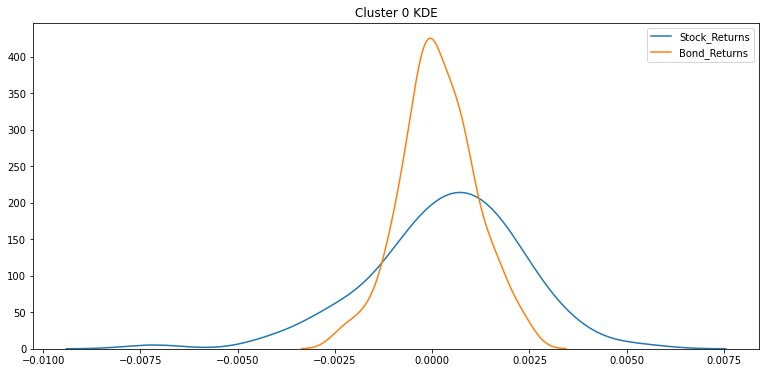

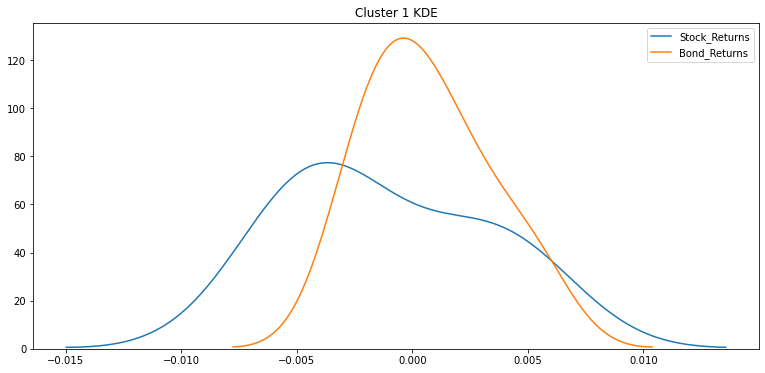

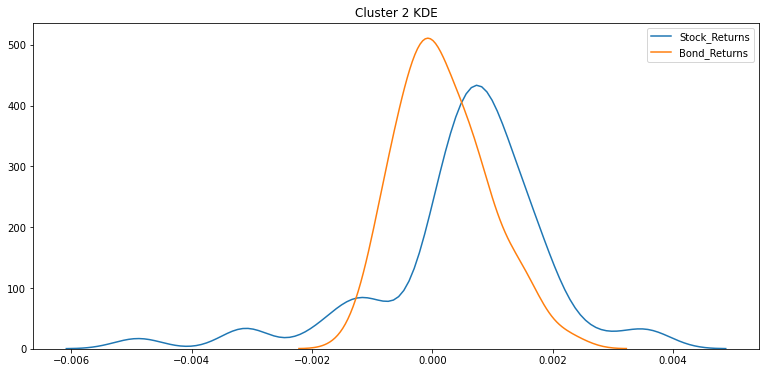

In [5]:
for c in np.sort(res.Cluster.unique()):
    plt.figure(figsize=(13,6))
    p1 = sns.kdeplot(res[res['Cluster']==c].Stock_Returns)
    p1 = sns.kdeplot(res[res['Cluster']==c].Bond_Returns)
    plt.title('Cluster {} KDE'.format(c))

In [6]:
out = []

for c in res.Cluster.unique():
    mask = ret.index.strftime('%m-%Y').isin(res[res['Cluster']==c].index.strftime('%m-%Y'))
    f = ret[mask]
    w1,w2,sh = shrp_wts(f.Stock_Returns,f.Bond_Returns)
    out.append((c,w1,w2,sh))
    

In [7]:
out

[(2, 0.3092572548839124, 0.6907427451160876, 0.09994138410480902),
 (0, 0.30033986425674114, 0.6996601357432588, 0.05536465710528869),
 (1, 0, 1, 0.06740154885360386)]

In [8]:
np.array(out)[:,3]*np.sqrt(252)

array([1.58652029, 0.87888668, 1.06996642])

In [9]:
res.tail(36)

,Stock_Returns,Bond_Returns,Cluster
2017-01-01,0.000895,0.000112,0
2017-02-01,0.001928,0.000520,0
2017-03-01,-0.000004,-0.000059,0
2017-04-01,0.000487,0.000610,2
2017-05-01,0.000535,0.000421,2
2017-06-01,0.000228,-0.000321,2
2017-07-01,0.000965,0.000145,2
2017-08-01,0.000040,0.000783,2
2017-09-01,0.000962,-0.000846,2
2017-10-01,0.001050,-0.000111,2
